# Лабораторная работа №1

## Выполнила: Ли Алина гр. 932001
### Вариант Чёт

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import matplotlib.pyplot as plt #импорт модуля для графиков
from sklearn.metrics import recall_score , precision_score, accuracy_score, roc_auc_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [268]:
import pandas as pd

# Загрузка данных из файла CSV
data1 = pd.read_csv('bank-additional.csv')

# <b>1. Оформил ли клиент срочный депозит?</b>
(Бинарный Классификатор)

In [155]:
print(f"Размерность: {data1.shape}")

Размерность: (4119, 21)


In [12]:
# Выделение первых 5 и последних 5 записей
first_5 = data1.head(5)
last_5 = data1.tail(5)

# Вывод первых 5 записей в виде красивой таблицы
print("Первые 5 записей:")
display(first_5.style)

# Вывод последних 5 записей в виде красивой таблицы
print("Последние 5 записей:")
display(last_5.style)

Первые 5 записей:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.800000,92.893000,-46.200000,1.313000,5099.100000,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.100000,93.994000,-36.400000,4.855000,5191.000000,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.400000,94.465000,-41.800000,4.962000,5228.100000,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.400000,94.465000,-41.800000,4.959000,5228.100000,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.100000,93.200000,-42.000000,4.191000,5195.800000,no


Последние 5 записей:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.958000,5228.100000,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.400000,93.918000,-42.700000,4.959000,5228.100000,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.800000,92.893000,-46.200000,1.354000,5099.100000,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.400000,93.444000,-36.100000,4.966000,5228.100000,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,175,1,999,0,nonexistent,-0.100000,93.200000,-42.000000,4.120000,5195.800000,no


In [25]:
data1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [26]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [27]:
data1.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

###### Результат выполнения этой команды равен нулю для всех столбцов, это означает, что в данных нет пропущенных значений и все столбцы полностью заполнены.

In [25]:
print(f"job: {data1['job'].unique()}")
print(f"marital: {data1['marital'].unique()}")
print(f"education: {data1['education'].unique()}")
print(f"default: {data1['default'].unique()}")
print(f"housing: {data1['housing'].unique()}")
print(f"contact: {data1['contact'].unique()}")
print(f"month: {data1['month'].unique()}")
print(f"day_of_week {data1['day_of_week'].unique()}")
print(f"campaign: {data1['campaign'].unique()}")
print(f"month: {data1['month'].unique()}")
print(f"day_of_week {data1['day_of_week'].unique()}")
print(f"poutcome {data1['poutcome'].unique()}")
print(f"loan {data1['loan'].unique()}")
print(f"poutcome {data1['poutcome'].unique()}")

job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed'
 'unknown']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'unknown' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: [1 0]
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
campaign: [ 2  4  1  3  6  7 27  5 12 14 10  8 11 13  9 15 16 18 17 22 19 23 24 35
 29]
month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
day_of_week ['fri' 'wed' 'mon' 'thu' 'tue']
poutcome ['nonexistent' 'failure' 'success']
loan ['no' 'unknown' 'yes']
poutcome ['nonexistent' 'failure' 'success']


In [269]:
dict = {'yes':1,'no':0,'unknown':0}
data1['default'] = data1['default'].map(dict)
dict = {'yes':1,'no':0,'unknown':0}
data1['housing'] = data1['housing'].map(dict)
data1['loan'] = data1['loan'].map(dict)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,0,1,0,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,0,0,0,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,0,1,0,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,0,0,0,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,0,1,0,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [270]:
dict = {'success':1,'failure':0,'nonexistent':0}
data1['poutcome'] = data1['poutcome'].map(dict)
data1.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,0,1,0,cellular,may,fri,...,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,0,0,0,telephone,may,fri,...,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,0,1,0,telephone,jun,wed,...,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,0,0,0,telephone,jun,fri,...,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,0,1,0,cellular,nov,mon,...,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,no


In [271]:
y_dict = {'yes':1,'no':0}
data1['binY'] = data1['y'].map(y_dict)

In [272]:
data1[['y','binY']].head(20)

,y,binY
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


### Разделим данные на обучающую, тестовую и валидационную выборки

In [273]:
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data1[['age','default','housing','loan','duration','poutcome','cons.price.idx','cons.conf.idx','euribor3m']]
y = data1['binY']  # Целевая переменная 'binY'

In [274]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.3, random_state = 0)

In [276]:
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (2018, 9)
Validation : (865, 9)
Test : (1236, 9)


In [277]:
X

array([[0.17142857, 0.        , 1.        , ..., 0.26968044, 0.19246862,
        0.1537415 ],
       [0.3       , 0.        , 0.        , ..., 0.69875292, 0.60251046,
        0.9569161 ],
       [0.1       , 0.        , 1.        , ..., 0.88230709, 0.37656904,
        0.98117914],
       ...,
       [0.12857143, 0.        , 0.        , ..., 0.26968044, 0.19246862,
        0.16303855],
       [0.57142857, 0.        , 0.        , ..., 0.48441154, 0.61506276,
        0.98208617],
       [0.22857143, 0.        , 1.        , ..., 0.3893219 , 0.36820084,
        0.79024943]])

### <b>Создание и обучение нейронной сети</b>

In [298]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
bin_model = Sequential([
    layers.Dense(4, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

In [299]:
bin_model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 4)                 40        
                                                                 
 dense_79 (Dense)            (None, 1)                 5         
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [300]:
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [301]:
history = bin_model.fit(X_train, y_train, epochs=90, batch_size=9, validation_data=(X_val, y_val))
history_dict = history.history

Epoch 1/90
225/225 [==============================] - 1s 2ms/step - loss: 0.5719 - accuracy: 0.8880 - val_loss: 0.4510 - val_accuracy: 0.8902
Epoch 2/90
225/225 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8905 - val_loss: 0.3661 - val_accuracy: 0.8902
Epoch 3/90
225/225 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.8905 - val_loss: 0.3367 - val_accuracy: 0.8902
Epoch 4/90
225/225 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.8905 - val_loss: 0.3157 - val_accuracy: 0.8913
Epoch 5/90
225/225 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8949 - val_loss: 0.2972 - val_accuracy: 0.8960
Epoch 6/90
225/225 [==============================] - 0s 1ms/step - loss: 0.2850 - accuracy: 0.8984 - val_loss: 0.2852 - val_accuracy: 0.9040
Epoch 7/90
225/225 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8999 - val_loss: 0.2778 - val_accuracy: 0.9064
Epoch 

225/225 [==============================] - 0s 1ms/step - loss: 0.1963 - accuracy: 0.9207 - val_loss: 0.2271 - val_accuracy: 0.9098
Epoch 59/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1958 - accuracy: 0.9202 - val_loss: 0.2279 - val_accuracy: 0.9121
Epoch 60/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1962 - accuracy: 0.9197 - val_loss: 0.2279 - val_accuracy: 0.9121
Epoch 61/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9212 - val_loss: 0.2271 - val_accuracy: 0.9110
Epoch 62/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9207 - val_loss: 0.2265 - val_accuracy: 0.9133
Epoch 63/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1959 - accuracy: 0.9197 - val_loss: 0.2272 - val_accuracy: 0.9098
Epoch 64/90
225/225 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.9217 - val_loss: 0.2289 - val_accuracy: 0.9098
Epoch 65/90

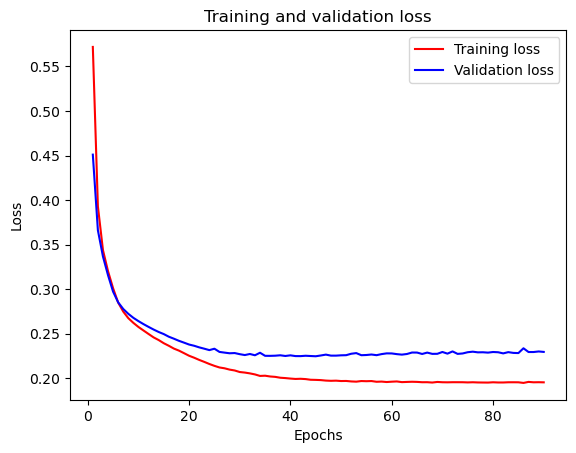

In [302]:
import matplotlib.pyplot as plt #импорт модуля для графиков
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

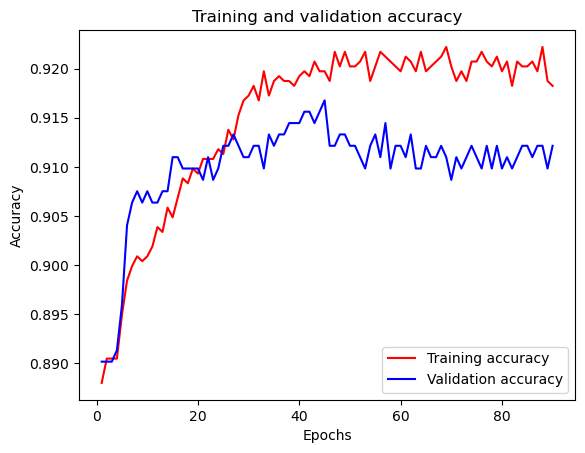

In [303]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [304]:
bin_model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 840us/step - loss: 0.2294 - accuracy: 0.9053


[0.22937779128551483, 0.905339777469635]

In [305]:
x_ex = X_test[11,:]
y_pred=bin_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(12))

1/1 [==============================] - 0s 33ms/step
[0.7932673]
2452    0
267     0
1699    0
655     0
3338    0
55      0
28      0
2959    0
1125    0
423     0
627     0
2335    1
Name: binY, dtype: int64


### Recall, Precision, Weighted Accuracy, AUC

In [306]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
#чтобы получить бинарные метки
y_prob = bin_model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall1 = recall_score(y_test, y_pred, average='weighted')
precision1 = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy1 = accuracy_score(y_test, y_pred)
auc1 = roc_auc_score(y_test, y_prob)

print(f'Recall : {recall1}')
print(f'Precision : {precision1}')
print(f'Weighted Accuracy : {weighted_accuracy1}')
print(f'AUC : {auc1}')

39/39 [==============================] - 0s 709us/step
Recall : 0.9053398058252428
Precision : 0.8946801545733266
Weighted Accuracy : 0.9053398058252428
AUC : 0.9122548524910015


### ПОПЫТКА 2

In [343]:
from keras.layers import Dropout
from keras import regularizers

bin_model2 = Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [415]:
bin_model2.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 128)               1280      
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9601 (37.50 KB)
Trainable params: 9601 (37.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [344]:
from keras.optimizers import Adam

custom_optimizer = Adam(learning_rate=0.001)
bin_model2.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [345]:
history = bin_model2.fit(X_train, y_train, epochs=100, batch_size=20, validation_data=(X_val, y_val))
history_dict2 = history.history

Epoch 1/100
101/101 [==============================] - 1s 3ms/step - loss: 0.4647 - accuracy: 0.8895 - val_loss: 0.3786 - val_accuracy: 0.8902
Epoch 2/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8989 - val_loss: 0.3269 - val_accuracy: 0.9087
Epoch 3/100
101/101 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.9019 - val_loss: 0.2989 - val_accuracy: 0.9052
Epoch 4/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.9073 - val_loss: 0.2861 - val_accuracy: 0.9156
Epoch 5/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2712 - accuracy: 0.9058 - val_loss: 0.2602 - val_accuracy: 0.9133
Epoch 6/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.9128 - val_loss: 0.2495 - val_accuracy: 0.9133
Epoch 7/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9172 - val_loss: 0.2442 - val_accuracy: 0.9145

Epoch 58/100
101/101 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9207 - val_loss: 0.2232 - val_accuracy: 0.9040
Epoch 59/100
101/101 [==============================] - 0s 1ms/step - loss: 0.1993 - accuracy: 0.9207 - val_loss: 0.2574 - val_accuracy: 0.9064
Epoch 60/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9242 - val_loss: 0.2280 - val_accuracy: 0.9121
Epoch 61/100
101/101 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9222 - val_loss: 0.2315 - val_accuracy: 0.9017
Epoch 62/100
101/101 [==============================] - 0s 1ms/step - loss: 0.2039 - accuracy: 0.9222 - val_loss: 0.2224 - val_accuracy: 0.9064
Epoch 63/100
101/101 [==============================] - 0s 1ms/step - loss: 0.2051 - accuracy: 0.9192 - val_loss: 0.2504 - val_accuracy: 0.9087
Epoch 64/100
101/101 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9187 - val_loss: 0.2339 - val_accuracy:

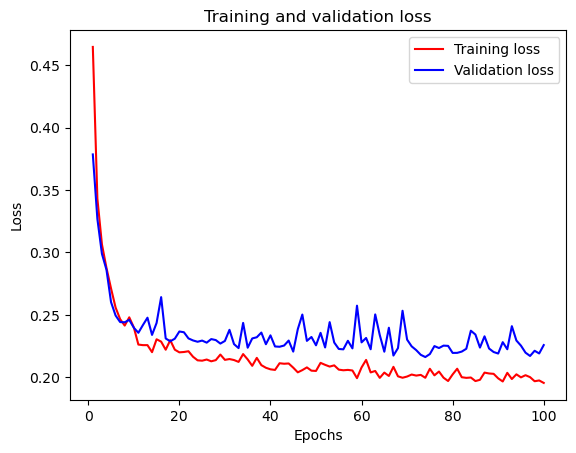

In [346]:
loss_values = history_dict2['loss']
val_loss_values = history_dict2['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

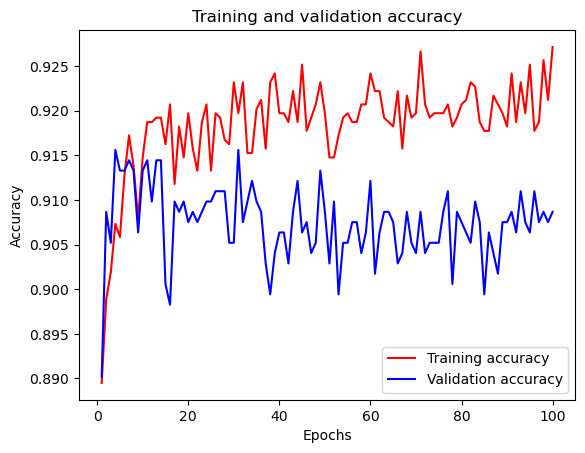

In [347]:
plt.clf()
acc_values = history_dict2['accuracy']
val_acc_values = history_dict2['val_accuracy']
plt.plot(epochs, acc_values, 'r', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [348]:
bin_model2.evaluate(X_test, y_test)

39/39 [==============================] - 0s 866us/step - loss: 0.2340 - accuracy: 0.9013


[0.234009250998497, 0.901294469833374]

In [349]:
x_ex = X_test[11,:]
y_pred=bin_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])
print(y_test.head(12))

1/1 [==============================] - 0s 40ms/step
[0.62640136]
2452    0
267     0
1699    0
655     0
3338    0
55      0
28      0
2959    0
1125    0
423     0
627     0
2335    1
Name: binY, dtype: int64


In [355]:
y_prob = bin_model2.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

recall2 = recall_score(y_test, y_pred, average='weighted')
precision2 = precision_score(y_test, y_pred, average='weighted')
weighted_accuracy2 = accuracy_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_prob)

print(f'Recall : {recall2}')
print(f'Precision : {precision2}')
print(f'Weighted Accuracy : {weighted_accuracy2}')
print(f'AUC : {auc2}')

39/39 [==============================] - 0s 761us/step
Recall : 0.901294498381877
Precision : 0.887183989687412
Weighted Accuracy : 0.901294498381877
AUC : 0.9115013287583679


In [356]:
results = pd.DataFrame({'Metric': ['Recall', 'Precision', 'Weighted Accuracy', 'AUC'],
                        'Model 1': [recall1, precision1, weighted_accuracy1, auc1],
                        'Model 2': [recall2, precision2, weighted_accuracy2, auc2]})

print(results)

              Metric   Model 1   Model 2
0             Recall  0.905340  0.901294
1          Precision  0.894680  0.887184
2  Weighted Accuracy  0.905340  0.901294
3                AUC  0.912255  0.911501


Анализ результатов оценки моделей:

<b>Recall:</b>
Обе модели имеют высокие значения полноты, т.е они хорошо способны идентифицировать положительные случаи.(Model 1 немного превосходит Model 2)
 
<b>Precision:</b>
Модель 1 имеет немного более высокую точность.
    
<b>Weighted Accuracy:</b>
Обе модели показывают схожую взвешенную точность, что свидетельствует о хорошем балансе между полнотой и точностью.

<b>AUC:</b>
Значения AUC для моделей близки друг к другу, что указывает на схожее качество моделей в разделении классов.
    
Обе модели представляют собой хорошие модели с высокими показателями полноты, точности и AUC.

# <b>2. Оценка здоровья внутриутробного развития плода.</b>
(Многоклассовый классификатор)

In [368]:
# Загрузка данных из файла CSV
data2 = pd.read_csv('fetal_health.csv')

In [10]:
print(f"Размерность: {data2.shape}")

Размерность: (2126, 22)


In [11]:
# Выделение первых 5 и последних 5 записей
first_5 = data2.head(5)

# Вывод первых 5 записей в виде красивой таблицы
print("Первые 5 записей:")
display(first_5.style)

Первые 5 записей:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.500000,43.000000,2.400000,64.000000,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,2.000000
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000000,0.000000,17.000000,2.100000,0.000000,10.400000,130.000000,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,1.000000
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.100000,0.000000,13.400000,130.000000,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,1.000000
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000000,0.000000,16.000000,2.400000,0.000000,23.000000,117.000000,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,1.000000
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000000,0.000000,16.000000,2.400000,0.000000,19.900000,117.000000,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,1.000000


In [8]:
data2.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
data2.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

### Разделим данные на обучающую, тестовую и валидационную выборки

In [369]:
print(f"fetal_health {data2['fetal_health'].unique()}")

fetal_health [2. 1. 3.]


In [370]:
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data2.drop(['fetal_health'], axis=1)  # Признаки, за исключением целевой переменной fetal_health
y = data2['fetal_health']  # Целевая переменная fetal_health

In [371]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (1360, 21)
Validation : (340, 21)
Test : (426, 21)


In [373]:
y_train

1892    1.0
842     1.0
306     2.0
207     1.0
1359    1.0
       ... 
772     2.0
1805    1.0
35      1.0
1398    1.0
1678    1.0
Name: fetal_health, Length: 1360, dtype: float64

In [374]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [375]:
y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [376]:
multi_model = Sequential()
multi_model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
multi_model.add(Dense(4, activation='softmax'))

In [377]:
multi_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [378]:
history = multi_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10)
history_dict3 = history.history

Epoch 1/50
136/136 [==============================] - 1s 2ms/step - loss: 0.8317 - accuracy: 0.7779 - val_loss: 0.6889 - val_accuracy: 0.7794
Epoch 2/50
136/136 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.7779 - val_loss: 0.5973 - val_accuracy: 0.7794
Epoch 3/50
136/136 [==============================] - 0s 1ms/step - loss: 0.5475 - accuracy: 0.7787 - val_loss: 0.5217 - val_accuracy: 0.7824
Epoch 4/50
136/136 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7971 - val_loss: 0.4602 - val_accuracy: 0.8118
Epoch 5/50
136/136 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.8346 - val_loss: 0.4168 - val_accuracy: 0.8294
Epoch 6/50
136/136 [==============================] - 0s 1ms/step - loss: 0.3904 - accuracy: 0.8522 - val_loss: 0.3894 - val_accuracy: 0.8353
Epoch 7/50
136/136 [==============================] - 0s 1ms/step - loss: 0.3641 - accuracy: 0.8566 - val_loss: 0.3624 - val_accuracy: 0.8588
Epoch 

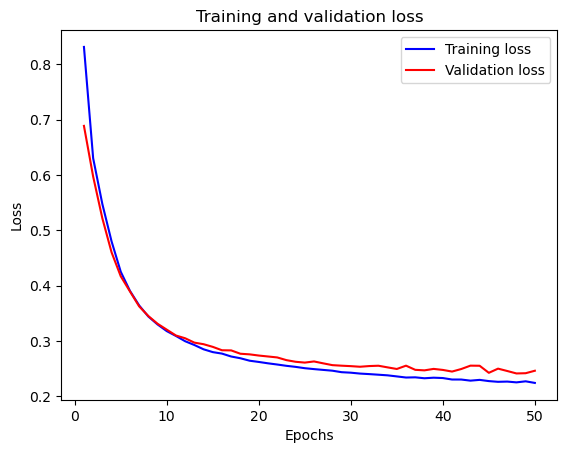

In [379]:
loss_values = history_dict3['loss']
val_loss_values = history_dict3['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

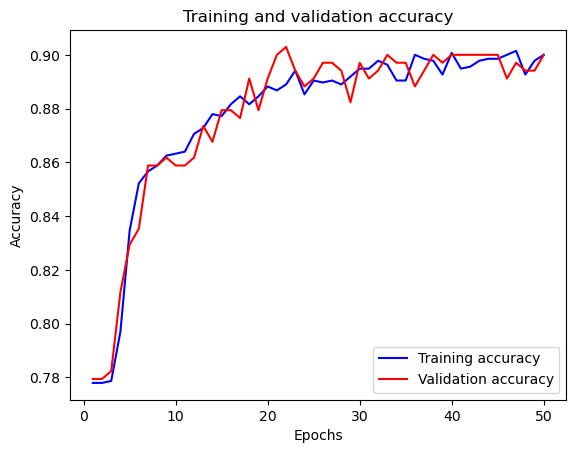

In [380]:
plt.clf()
acc_values = history_dict3['accuracy']
val_acc_values = history_dict3['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [381]:
multi_model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 998us/step - loss: 0.2682 - accuracy: 0.9014


[0.26822325587272644, 0.9014084339141846]

In [382]:
y_test[1]

array([0., 1., 0., 0.], dtype=float32)

In [383]:
x_ex = X_test[1,:]
y1 = min_max_scaler.inverse_transform(x_ex.reshape(1, -1))
print(y1)
y_pred=multi_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

[[1.31e+02 1.00e-02 0.00e+00 3.00e-03 1.00e-03 0.00e+00 0.00e+00 5.40e+01
  1.40e+00 0.00e+00 3.30e+00 8.50e+01 8.40e+01 1.69e+02 7.00e+00 0.00e+00
  1.51e+02 1.43e+02 1.47e+02 2.00e+01 1.00e+00]]
1/1 [==============================] - 0s 32ms/step
[4.4132523e-08 9.9991679e-01 8.2697734e-05 4.9006599e-07]


In [384]:
y_pred = multi_model.predict(X_test)
print(y_pred)

14/14 [==============================] - 0s 921us/step
[[1.8507772e-05 1.2553008e-01 8.2894522e-01 4.5506205e-02]
 [4.4132609e-08 9.9991679e-01 8.2697814e-05 4.9006599e-07]
 [9.9019471e-06 9.9065429e-01 9.1863461e-03 1.4945898e-04]
 ...
 [1.4968585e-07 9.9923670e-01 7.5252459e-04 1.0559262e-05]
 [1.6934364e-07 9.9976009e-01 2.3733012e-04 2.3281343e-06]
 [5.1008408e-07 9.9972743e-01 1.1478153e-04 1.5725804e-04]]


In [385]:
y_test

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

### Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе.

In [389]:
from sklearn.metrics import recall_score

# Преобразуйте вероятности в предсказанные метки (классы)
y_pred_classes = y_pred.argmax(axis=-1)

# Вычислите recall для каждого класса
recall_per_class1 = recall_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите precision для каждого класса
precision_per_class1 = precision_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите взвешенную точность
weighted_accuracy1 = accuracy_score(y_test.argmax(axis=-1), y_pred_classes)


print("Recall per class:", recall_per_class1)
print("Precision per class:", precision_per_class1)
print("Weighted Accuracy:", weighted_accuracy1)


Recall per class: [0.96385542 0.66101695 0.71428571]
Precision per class: [0.93841642 0.72222222 0.80645161]
Weighted Accuracy: 0.9014084507042254


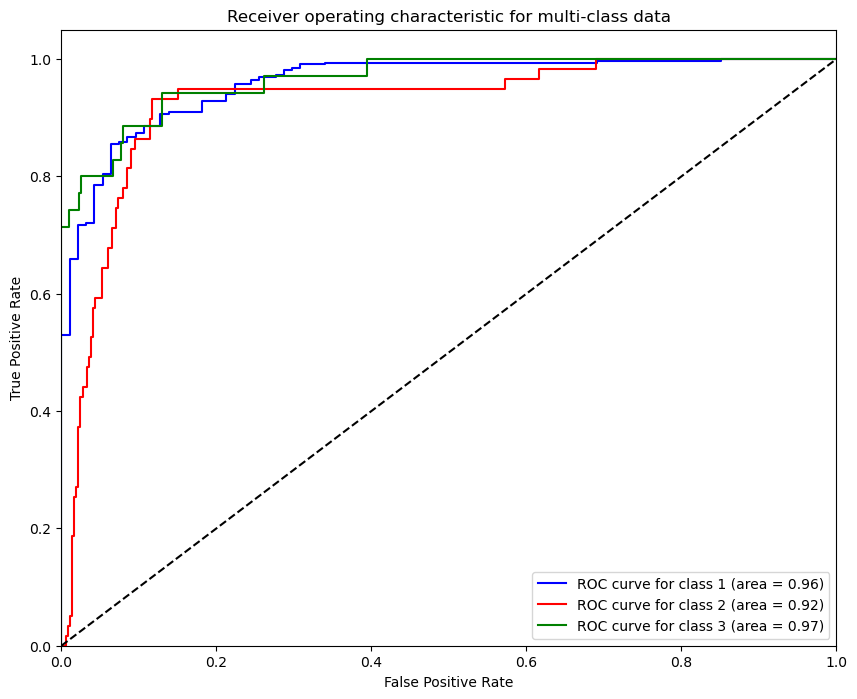

{1: 0.9595616508587542, 2: 0.9249526624486215, 3: 0.9658019729630982}


In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

auc_score = {}

for i in range(1, 4):
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train[:, i])    

    prob_test_vec = clf.predict_proba(X_test)
    
    fpr_i, tpr_i, _ = roc_curve(y_test[:, i], prob_test_vec[:, 1])
    auc_value = auc(fpr_i, tpr_i)
    
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc_value)

    auc_score[i] = auc_value

# Визуализируйте ROC-кривые для каждого класса
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(1, 4), colors):  
    plt.plot(fpr[i-1], tpr[i-1], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i-1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

print(auc_score)


### ПОПЫТКА 2

In [399]:
data2 = pd.read_csv('fetal_health.csv')
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data2.drop(['fetal_health'], axis=1)  # Признаки, за исключением целевой переменной fetal_health
y = data2['fetal_health']  # Целевая переменная fetal_health

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

# Разделение данных на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.8, random_state=0)

print(f'Train: {X_train.shape}')
print(f'Validation: {X_val.shape}')
print(f'Test: {X_test.shape}')

#unique_classes = np.unique(y_train)
#num_classes = len(unique_classes)
#print(f'unique_classes: {unique_classes}')
#print(f'num_classes: {num_classes}')

y_train

Train: (1700, 21)
Validation: (85, 21)
Test: (341, 21)


2009    1.0
1820    1.0
1550    1.0
377     1.0
1407    1.0
       ... 
563     1.0
1985    1.0
1696    1.0
702     3.0
564     1.0
Name: fetal_health, Length: 1700, dtype: float64

In [400]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

y_train

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [401]:
multi_model2 = Sequential()
multi_model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
multi_model2.add(Dense(32, activation='relu'))
multi_model2.add(Dense(16, activation='relu'))
multi_model2.add(Dense(4, activation='softmax'))

In [402]:
from tensorflow.keras.optimizers import RMSprop
# Компиляция модели с оптимизатором RMSprop
optimizer = RMSprop(learning_rate=0.001)
multi_model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [403]:
history = multi_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=10)
history_dict4 = history.history

Epoch 1/50
170/170 [==============================] - 1s 2ms/step - loss: 0.6217 - accuracy: 0.7847 - val_loss: 0.4513 - val_accuracy: 0.8000
Epoch 2/50
170/170 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8524 - val_loss: 0.3760 - val_accuracy: 0.8588
Epoch 3/50
170/170 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8641 - val_loss: 0.3555 - val_accuracy: 0.8824
Epoch 4/50
170/170 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8759 - val_loss: 0.3525 - val_accuracy: 0.8824
Epoch 5/50
170/170 [==============================] - 0s 1ms/step - loss: 0.2690 - accuracy: 0.8800 - val_loss: 0.3472 - val_accuracy: 0.8941
Epoch 6/50
170/170 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8871 - val_loss: 0.3460 - val_accuracy: 0.8824
Epoch 7/50
170/170 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.8841 - val_loss: 0.3576 - val_accuracy: 0.8706
Epoch 

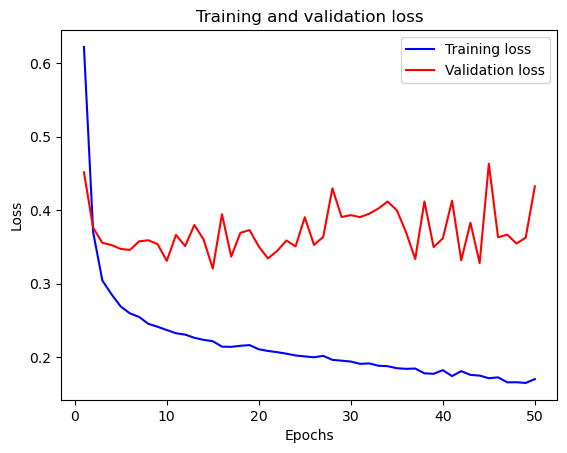

In [404]:
loss_values = history_dict4['loss']
val_loss_values = history_dict4['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

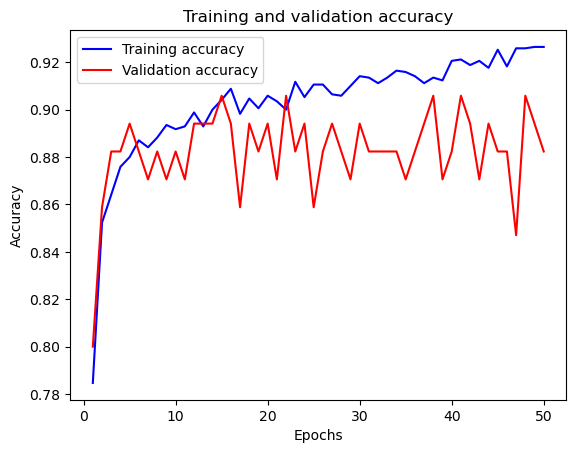

In [405]:
plt.clf()
acc_values = history_dict4['accuracy']
val_acc_values = history_dict4['val_accuracy']
plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [406]:
multi_model2.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.2462 - accuracy: 0.9003


[0.24621808528900146, 0.900293231010437]

In [407]:
y_test[1]

array([0., 1., 0., 0.], dtype=float32)

In [408]:
x_ex = X_test[1,:]
y1 = min_max_scaler.inverse_transform(x_ex.reshape(1, -1))
print(y1)
y_pred=multi_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])

[[1.22e+02 0.00e+00 0.00e+00 7.00e-03 7.00e-03 0.00e+00 0.00e+00 2.10e+01
  1.90e+00 0.00e+00 5.60e+00 7.30e+01 7.70e+01 1.50e+02 3.00e+00 2.00e+00
  1.27e+02 1.15e+02 1.17e+02 3.00e+01 0.00e+00]]
1/1 [==============================] - 0s 42ms/step
[8.861473e-11 9.999902e-01 9.833048e-06 9.911564e-09]


In [409]:
y_pred = multi_model2.predict(X_test)
print(y_pred)

11/11 [==============================] - 0s 901us/step
[[6.1397863e-08 9.2211819e-01 7.7852577e-02 2.9182516e-05]
 [8.8614900e-11 9.9999022e-01 9.8330393e-06 9.9115640e-09]
 [2.0584998e-06 8.0224955e-01 1.9470252e-01 3.0458060e-03]
 ...
 [4.5885549e-19 1.0000000e+00 2.3713529e-11 1.9131903e-17]
 [1.9046089e-05 1.7723093e-02 7.7385640e-01 2.0840152e-01]
 [1.3479126e-15 2.1062620e-08 1.1454912e-08 1.0000000e+00]]


### Recall, Precision, Weighted Accuracy, AUC для всех классов всех исследованных моделей. Вывести ROC-кривые для каждого класса в лучшем классификаторе.

In [410]:
from sklearn.metrics import recall_score

# Преобразуйте вероятности в предсказанные метки (классы)
y_pred_classes = y_pred.argmax(axis=-1)

# Вычислите recall для каждого класса
recall_per_class2 = recall_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите precision для каждого класса
precision_per_class2 = precision_score(y_test.argmax(axis=-1), y_pred_classes, average=None)

# Вычислите взвешенную точность
weighted_accuracy2 = accuracy_score(y_test.argmax(axis=-1), y_pred_classes)


print("Recall per class:", recall_per_class2)
print("Precision per class:", precision_per_class2)
print("Weighted Accuracy:", weighted_accuracy2)

Recall per class: [0.94736842 0.72340426 0.75      ]
Precision per class: [0.95454545 0.66666667 0.80769231]
Weighted Accuracy: 0.9002932551319648


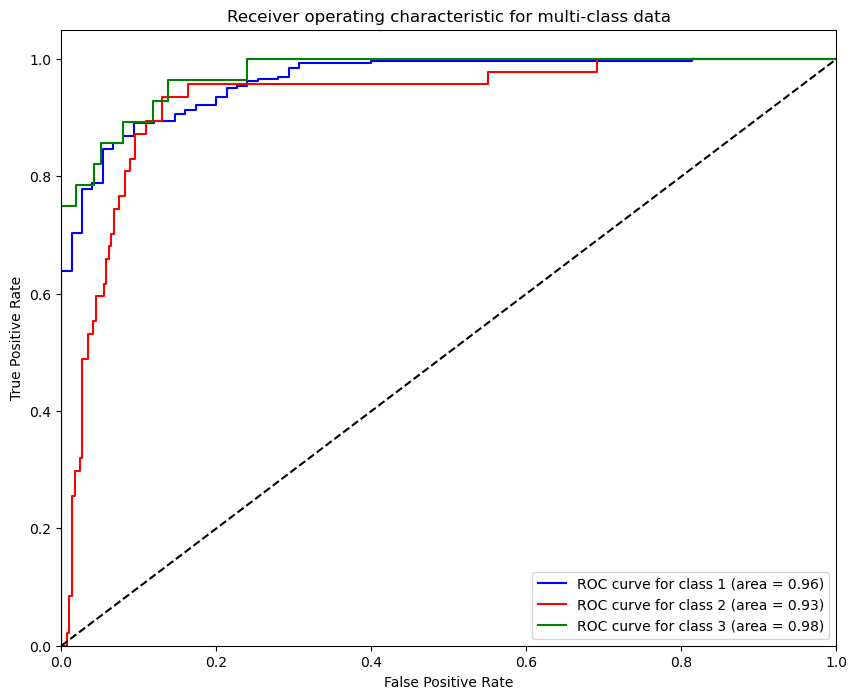

{1: 0.9631578947368421, 2: 0.9289332754378348, 3: 0.9754678229119124}


In [411]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

fpr = []
tpr = []
roc_auc = []

auc_score = {}

for i in range(1, 4):  
    clf = LogisticRegression(random_state=0)
    clf.fit(X_train, y_train[:, i])
    
    prob_test_vec = clf.predict_proba(X_test)

    fpr_i, tpr_i, _ = roc_curve(y_test[:, i], prob_test_vec[:, 1])
    auc_value = auc(fpr_i, tpr_i)

    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc_value)

    auc_score[i] = auc_value

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow']
for i, color in zip(range(1, 4), colors):
    plt.plot(fpr[i-1], tpr[i-1], color=color,
             label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i-1]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

print(auc_score)


## <b>3. Оценка уровня потребления ресурсов домохозяйством.</b>
(Регрессор)

In [75]:
# Загрузка данных из файла CSV
data3 = pd.read_csv('DS_2019_public.csv')
print(f"Размерность: {data3.shape}")

Размерность: (10875, 121)


In [37]:
# Выделение первых 5 и последних 5 записей
first_5 = data3.head(5)

# Вывод первых 5 записей в виде красивой таблицы
print("Первые 5 записей:")
display(first_5.style)

Первые 5 записей:


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,CELLAR,NWEIGHT,TOTHSQFT,HEATHOME,NUMPC,DOLLAREL,DOLELOTH,CUFEETNGSPH,BTUNGSPH,DOLNGSPH,TEMPHOME,TOTCSQFT,BTUFOSPH,AIRCOND,ELCOOL,GALLONFOSPH,WALLTYPE,TOTALDOLOTH,BTUFO,GALLONFO,DOLFOSPH,DOLLARFO,KWHSPH,BTUELSPH,FOWARM,USEFO,TOTUSQFT,TOTALDOL,NUMTHERM,DOLELSPH,CONCRETE,CUFEETNG,BTUNG,GALLONFOOTH,BTUFOOTH,BEDROOMS,FOWATER,GALLONFOWTH,BTUFOWTH,DOLFOWTH,GALLONKEROTH,BTUKEROTH,DOLKEROTH,TOTUCSQFT,TOTSQFT,TOTSQFT_EN,DOLNGWTH,DOLFOOTH,ELOTHER,DOLLARNG,FUELHEAT,NOTMOIST,GALLONKER,BTUKER,NUMCFAN,FOILAUX,TOTALBTU,COOLTYPE,DOOR1SUM,DOLLARKER,DOLLPOTH,DOLELWTH,KWHWTH,BTUELWTH,TOTROOMS,ELWATER,GALLONKERSPH,BTUKERSPH,TOTALBTUOTH,GALLONLPSPH,BTULPSPH,NCOMBATH,OVEN,EQUIPM,STORIES,GALLONLP,BTULP,LGT1,SOLWARM,FUELH2O,GALLONLPOTH,BTULPOTH,TVCOLOR,SOLARAUX,CUFEETNGOTH,BTUNGOTH,KWHOTH,DOLKERSPH,TOTALDOLWTH,DOLLPSPH,USENG,YEARMADE,BTUELOTH,KWH,BTUEL,DOLLARLP,CUFEETNGWTH,BTUNGWTH,UGWATER,SDESCENT,TEMPGONE,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793000,17,181.998000,620.979000,621,368,38606,0,8599.172010,2736,1,2,475,337.315000,376.643000,38605.955000,367.654000,70,2736,0.000000,1,1,0.000000,2,501,0,0,0.000000,0,0.000000,0.000000,0,0,400,1293,1,0.000000,0,838,85895,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,3136,2736,286.745000,0.000000,1,818,1,0,0,0,0,0,103460,1,0,0,0.000000,0.000000,0.000000,0.000000,4,0,0,0.000000,29653,0.000000,0.000000,2,0,3,31,0,0,0,0,1,0.000000,0.000000,2,0,167.601000,17179.073000,3655.782000,0.000000,287,0.000000,1,1998,12473.544000,5148,17565,0,293.756000,30109.973000,1,0,70,-2,30110,2,120.893000,121,4,0,1,1,1310.220000
1,1,1,1,48.901000,49,184.459000,629.389000,629,582,40248,-2,8969.915921,528,1,1,588,296.353000,392.662000,40248.226000,581.517000,68,264,0.000000,1,1,0.000000,1,339,0,0,0.000000,0,0.000000,0.000000,0,0,0,1327,1,0.000000,-2,499,51148,0.000000,0.000000,1,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,264,528,528,114.618000,0.000000,1,739,1,0,0,0,1,0,58716,2,0,0,0.000000,0.000000,0.000000,0.000000,2,0,0,0.000000,6781,0.000000,0.000000,1,0,2,-2,0,0,2,0,1,0.000000,0.000000,1,0,28.944000,2966.796000,1117.878000,0.000000,115,0.000000,1,1965,3814.291000,2218,7568,0,77.394000,7932.978000,1,0,60,2,7933,-2,242.746000,243,2,0,1,-2,915.664000
2,1,3,7,101.048000,101,1063.022000,3627.013000,3627,425,40196,0,18003.639600,1623,1,2,952,512.731000,392.152000,40195.580000,424.514000,55,1623,0.000000,1,1,0.000000,6,534,0,0,0.000000,0,0.000000,0.000000,0,0,400,1398,1,0.000000,0,412,42230,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,400,2023,1623,0.000000,0.000000,1,446,1,0,0,0,1,0,76401,1,2,0,0.000000,179.424000,1887.531000,6440.221000,7,1,0,0.000000,20438,0.000000,0.000000,2,1,3,10,0,0,0,0,5,0.000000,0.000000,5,0,19.848000,2034.420000,5393.913000,0.000000,179,0.000000,1,1985,18403.933000,10015,34171,0,0.000000,0.000000,0,0,55,-2,6440,5,158.797000,159,7,0,1,5,1670.534000
3,1,1,1,0.000000,0,0.000000,0.000000,0,616,36136,1,5999.605242,1274,1,2,705,619.862000,352.549000,36136.283000,616.238000,70,0,0.000000,0,0,0.000000,2,620,0,0,0.000000,0,0.000000,0.000000,0,0,637,1558,1,0.000000,0,488,50020,0.000000,0.000000,2,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1912,1912,1912,236.762000,0.000000,1,853,1,0,0,0,0,0,59809,-2,1,0,0.000000,0.000000,0.000000,0.000000,5,0,0,0.000000,8607,0.000000,0.000000,1,0,3,20,0,0,2,0,1,0.000000,0.000000,2,0,0.000000,0.000000,2522.532000,0.000000,237,0.000000,1,1983,8606.856000,2869,9789,0,135.451000,13883.717000,1,0,70,2,13884,5,85.138000,85,5,0,1,5,346.468000
4,1,4,10,45.132000,45,274.530000,936.677000,937,685,74100,1,4232.486778,3485,1,2,1050,853.549000,722.927000,74100.451000,685.300000,66,1538,0.000000,1,1,0.000000,4,893,0,0,0.000000,0,0.000000,0.000000,0,0,0,1906,1,0.000000,0,903,92558,0.000000,0.000000,3,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,1946,3485,

In [239]:
data3.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10875 non-null  int64  
 1    DIVISION            10875 non-null  int64  
 2    REPORTABLE_DOMAIN   10875 non-null  int64  
 3    DOLELCOL            10805 non-null  float64
 4    TOTALDOLCOL         10875 non-null  int64  
 5    KWHCOL              10875 non-null  float64
 6    BTUELCOL            10875 non-null  float64
 7    TOTALBTUCOL         10875 non-null  int64  
 8    TOTALDOLSPH         10875 non-null  int64  
 9    TOTALBTUSPH         10875 non-null  int64  
 10   CELLAR              10875 non-null  int64  
 11   NWEIGHT             10875 non-null  float64
 12   TOTHSQFT            10875 non-null  int64  
 13   HEATHOME            10875 non-null  int64  
 14   NUMPC               10875 non-null  int64  
 15   DOLLAREL            10875 non-null

In [240]:
data3.isna().sum()

Climate_Region_Pub     0
DIVISION               0
REPORTABLE_DOMAIN      0
DOLELCOL              70
TOTALDOLCOL            0
                      ..
HEATROOM               0
WDWATER                0
UGWARM                 0
DRYRFUEL               0
KWHRFG                 0
Length: 121, dtype: int64

In [19]:
percent_null_bmi = (data3['DOLELCOL'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.64%


In [20]:
percent_null_bmi = (data3['DOLFOSPH'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [21]:
percent_null_bmi = (data3['DOLELSPH'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.04%


In [22]:
percent_null_bmi = (data3['CUFEETNGOTH'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.11%


In [23]:
percent_null_bmi = (data3['KWHOTH'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [24]:
percent_null_bmi = (data3['CUFEETNGWTH'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.03%


In [25]:
percent_null_bmi = (data3['DOLELRFG'].isna().sum() / data3.shape[0]) * 100
print(f"Percentage of Null values in BMI column: \033[2;37;31m{percent_null_bmi:.2f}%\033[0;37;31m")

Percentage of Null values in BMI column: 0.01%


In [76]:
data3 = data3.dropna()

### Разделим данные на обучающую, тестовую и валидационную выборки

In [77]:
# Разделим данные на обучающую, тестовую и валидационную выборки

X = data3.drop(['TOTALBTUCOL'], axis=1)  # Признаки, за исключением целевой переменной TOTALBTUCOL
y = data3['TOTALBTUCOL']  # Целевая переменная TOTALBTUCOL

In [78]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}')
print(f'Validation : {X_val.shape}')
print(f'Test : {X_test.shape}')

Train : (6902, 120)
Validation : (1726, 120)
Test : (2157, 120)


In [180]:
reg_model = Sequential()
reg_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
reg_model.add(Dense(32,activation='relu'))
reg_model.add(Dense(1))

In [154]:
reg_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 64)                7744      
                                                                 
 dense_41 (Dense)            (None, 32)                2080      
                                                                 
 dense_42 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
reg_model.compile(loss='mse', optimizer='adam', metrics='mae')

In [182]:
history = reg_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=350, batch_size=30)
history_dict = history.history

Epoch 1/350
231/231 [==============================] - 1s 2ms/step - loss: 104433896.0000 - mae: 5672.5884 - val_loss: 93063680.0000 - val_mae: 5330.9502
Epoch 2/350
231/231 [==============================] - 0s 1ms/step - loss: 81988488.0000 - mae: 5022.6680 - val_loss: 63817720.0000 - val_mae: 5013.2290
Epoch 3/350
231/231 [==============================] - 0s 1ms/step - loss: 65479644.0000 - mae: 5227.1392 - val_loss: 59197144.0000 - val_mae: 5282.0381
Epoch 4/350
231/231 [==============================] - 0s 1ms/step - loss: 62275880.0000 - mae: 5276.3467 - val_loss: 56273672.0000 - val_mae: 5102.4731
Epoch 5/350
231/231 [==============================] - 0s 1ms/step - loss: 59112996.0000 - mae: 5062.3091 - val_loss: 52941700.0000 - val_mae: 4915.7173
Epoch 6/350
231/231 [==============================] - 0s 1ms/step - loss: 55630492.0000 - mae: 4807.2671 - val_loss: 49586000.0000 - val_mae: 4652.0845
Epoch 7/350
231/231 [==============================] - 0s 1ms/step - loss: 520668

231/231 [==============================] - 0s 1ms/step - loss: 3907061.2500 - mae: 1215.0065 - val_loss: 3779328.5000 - val_mae: 1236.7863
Epoch 55/350
231/231 [==============================] - 0s 1ms/step - loss: 3703554.0000 - mae: 1191.1416 - val_loss: 3582784.0000 - val_mae: 1199.2133
Epoch 56/350
231/231 [==============================] - 0s 1ms/step - loss: 3543483.2500 - mae: 1168.2570 - val_loss: 3433567.5000 - val_mae: 1173.1283
Epoch 57/350
231/231 [==============================] - 0s 1ms/step - loss: 3376034.5000 - mae: 1141.3728 - val_loss: 3311436.0000 - val_mae: 1151.9436
Epoch 58/350
231/231 [==============================] - 0s 1ms/step - loss: 3227077.5000 - mae: 1122.8763 - val_loss: 3140038.5000 - val_mae: 1129.2670
Epoch 59/350
231/231 [==============================] - 0s 1ms/step - loss: 3084444.0000 - mae: 1098.0815 - val_loss: 3011663.7500 - val_mae: 1103.3918
Epoch 60/350
231/231 [==============================] - 0s 1ms/step - loss: 2941886.5000 - mae: 1073.

Epoch 109/350
231/231 [==============================] - 0s 1ms/step - loss: 397759.0625 - mae: 374.4905 - val_loss: 373320.9688 - val_mae: 366.6381
Epoch 110/350
231/231 [==============================] - 0s 1ms/step - loss: 392409.2500 - mae: 372.3112 - val_loss: 385108.2500 - val_mae: 381.1530
Epoch 111/350
231/231 [==============================] - 0s 1ms/step - loss: 386073.7500 - mae: 370.2343 - val_loss: 352205.7812 - val_mae: 354.3438
Epoch 112/350
231/231 [==============================] - 0s 1ms/step - loss: 384703.4375 - mae: 367.8595 - val_loss: 344703.6562 - val_mae: 348.8365
Epoch 113/350
231/231 [==============================] - 0s 1ms/step - loss: 374137.1250 - mae: 360.0684 - val_loss: 367999.8438 - val_mae: 374.8541
Epoch 114/350
231/231 [==============================] - 0s 1ms/step - loss: 368792.4688 - mae: 357.8216 - val_loss: 341794.5312 - val_mae: 347.8052
Epoch 115/350
231/231 [==============================] - 0s 1ms/step - loss: 358515.0312 - mae: 350.9113 -

Epoch 164/350
231/231 [==============================] - 0s 1ms/step - loss: 215754.7969 - mae: 252.4834 - val_loss: 201959.9844 - val_mae: 259.3575
Epoch 165/350
231/231 [==============================] - 0s 1ms/step - loss: 212400.6250 - mae: 249.1771 - val_loss: 189631.4688 - val_mae: 242.0587
Epoch 166/350
231/231 [==============================] - 0s 1ms/step - loss: 211390.8125 - mae: 249.0419 - val_loss: 184229.7812 - val_mae: 239.8846
Epoch 167/350
231/231 [==============================] - 0s 1ms/step - loss: 212944.6094 - mae: 254.1257 - val_loss: 196170.3438 - val_mae: 259.5622
Epoch 168/350
231/231 [==============================] - 0s 1ms/step - loss: 208552.6875 - mae: 250.0079 - val_loss: 183142.7188 - val_mae: 238.9902
Epoch 169/350
231/231 [==============================] - 0s 1ms/step - loss: 204903.8125 - mae: 245.7523 - val_loss: 200773.2812 - val_mae: 265.7343
Epoch 170/350
231/231 [==============================] - 0s 1ms/step - loss: 203493.5156 - mae: 243.9244 -

Epoch 219/350
231/231 [==============================] - 0s 1ms/step - loss: 111295.1641 - mae: 182.3638 - val_loss: 97712.8047 - val_mae: 171.0542
Epoch 220/350
231/231 [==============================] - 0s 1ms/step - loss: 110404.8672 - mae: 180.5552 - val_loss: 97312.9297 - val_mae: 172.8482
Epoch 221/350
231/231 [==============================] - 0s 1ms/step - loss: 108057.2969 - mae: 178.9217 - val_loss: 114307.1875 - val_mae: 211.6857
Epoch 222/350
231/231 [==============================] - 0s 1ms/step - loss: 113737.1953 - mae: 190.9374 - val_loss: 100451.8828 - val_mae: 179.7401
Epoch 223/350
231/231 [==============================] - 0s 1ms/step - loss: 104182.4141 - mae: 174.6972 - val_loss: 103306.6641 - val_mae: 186.9904
Epoch 224/350
231/231 [==============================] - 0s 1ms/step - loss: 103118.6328 - mae: 175.0194 - val_loss: 92981.5781 - val_mae: 168.5111
Epoch 225/350
231/231 [==============================] - 0s 1ms/step - loss: 101207.0391 - mae: 170.9835 - va

231/231 [==============================] - 0s 1ms/step - loss: 44008.2695 - mae: 118.8426 - val_loss: 54028.1172 - val_mae: 147.5081
Epoch 275/350
231/231 [==============================] - 0s 1ms/step - loss: 44322.1680 - mae: 121.5260 - val_loss: 42432.7031 - val_mae: 116.5281
Epoch 276/350
231/231 [==============================] - 0s 1ms/step - loss: 43537.5977 - mae: 119.7907 - val_loss: 42962.7734 - val_mae: 119.3458
Epoch 277/350
231/231 [==============================] - 0s 1ms/step - loss: 41866.3984 - mae: 116.6084 - val_loss: 40939.9336 - val_mae: 114.3711
Epoch 278/350
231/231 [==============================] - 0s 1ms/step - loss: 40479.3203 - mae: 115.0918 - val_loss: 39066.0547 - val_mae: 107.1947
Epoch 279/350
231/231 [==============================] - 0s 1ms/step - loss: 40088.5273 - mae: 115.4612 - val_loss: 42485.7148 - val_mae: 122.1537
Epoch 280/350
231/231 [==============================] - 0s 1ms/step - loss: 39721.5508 - mae: 113.7917 - val_loss: 37530.1875 - val

231/231 [==============================] - 0s 1ms/step - loss: 11813.2471 - mae: 66.7037 - val_loss: 11367.0928 - val_mae: 60.5169
Epoch 331/350
231/231 [==============================] - 0s 1ms/step - loss: 11063.9082 - mae: 63.8464 - val_loss: 13181.9209 - val_mae: 69.6446
Epoch 332/350
231/231 [==============================] - 0s 1ms/step - loss: 10838.1328 - mae: 62.7642 - val_loss: 13091.7383 - val_mae: 71.1675
Epoch 333/350
231/231 [==============================] - 0s 1ms/step - loss: 10969.2109 - mae: 63.6349 - val_loss: 12452.6943 - val_mae: 71.6079
Epoch 334/350
231/231 [==============================] - 0s 1ms/step - loss: 10165.2920 - mae: 61.8073 - val_loss: 11709.8643 - val_mae: 68.8986
Epoch 335/350
231/231 [==============================] - 0s 1ms/step - loss: 10632.2979 - mae: 64.6682 - val_loss: 10092.1387 - val_mae: 57.2167
Epoch 336/350
231/231 [==============================] - 0s 1ms/step - loss: 9304.9736 - mae: 58.0592 - val_loss: 15056.2832 - val_mae: 87.3246


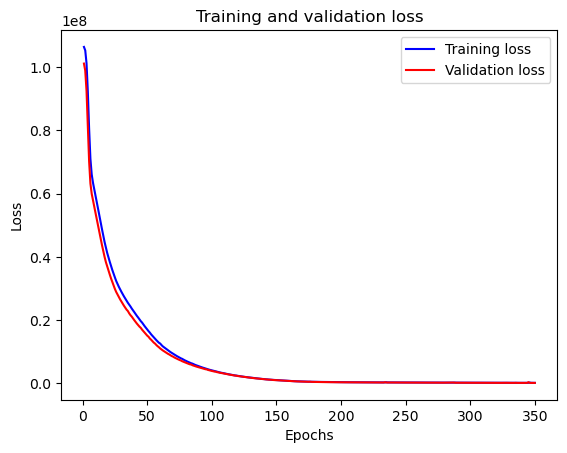

In [171]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

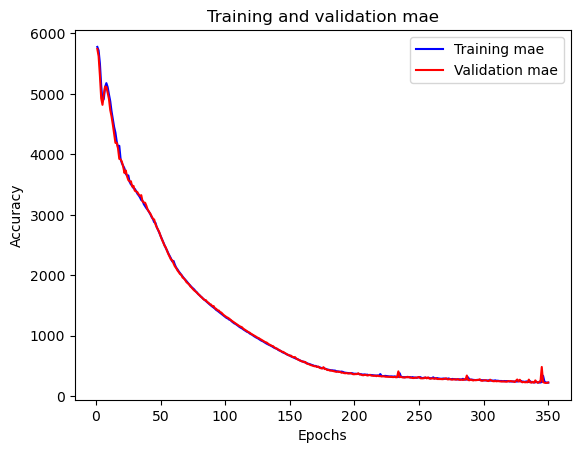

In [172]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [183]:
reg_model.evaluate(X_test, y_test)

68/68 [==============================] - 0s 804us/step - loss: 5792.2080 - mae: 46.1526


[5792.2080078125, 46.15256118774414]

In [69]:
y_test

8955      4607
10088      527
4729      2150
5731         0
3708       249
         ...  
9796         0
8969         0
638       1857
2628     17724
7329      3174
Name: TOTALBTUCOL, Length: 2157, dtype: int64

In [184]:
x_ex = X_test[1,:]
y_pred=reg_model.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 41ms/step
[516.6309]


### MSE, MAE, R2 

In [241]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse1 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse1}')

# Вычисление MAE
mae1 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae1}')

# Вычисление R^2
r2_1 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_1}')


68/68 [==============================] - 0s 982us/step
Mean Squared Error (MSE): 5792.209239270581
Mean Absolute Error (MAE): 46.15257886128123
R-squared (R^2): 0.9999186979121557


### ПОПЫТКА 2

In [231]:
reg_model2 = Sequential()
reg_model2.add(Dense(96, activation='relu', input_dim=X_train.shape[1]))
reg_model2.add(Dense(32,activation='relu'))
reg_model2.add(Dense(1))

In [416]:
reg_model2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 96)                11616     
                                                                 
 dense_74 (Dense)            (None, 32)                3104      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 14753 (57.63 KB)
Trainable params: 14753 (57.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [232]:
reg_model2.compile(loss='mse', optimizer='adam', metrics='mae')

In [233]:
history = reg_model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=550, batch_size=55)
history_dict = history.history

Epoch 1/550
126/126 [==============================] - 1s 2ms/step - loss: 105819192.0000 - mae: 5746.6274 - val_loss: 98730056.0000 - val_mae: 5614.3853
Epoch 2/550
126/126 [==============================] - 0s 1ms/step - loss: 96307216.0000 - mae: 5308.1123 - val_loss: 80989944.0000 - val_mae: 4918.5591
Epoch 3/550
126/126 [==============================] - 0s 1ms/step - loss: 75456200.0000 - mae: 4902.3838 - val_loss: 63287884.0000 - val_mae: 5012.2148
Epoch 4/550
126/126 [==============================] - 0s 1ms/step - loss: 65196792.0000 - mae: 5172.4277 - val_loss: 58773536.0000 - val_mae: 5177.0610
Epoch 5/550
126/126 [==============================] - 0s 2ms/step - loss: 61541240.0000 - mae: 5149.5718 - val_loss: 55297660.0000 - val_mae: 5078.7100
Epoch 6/550
126/126 [==============================] - 0s 1ms/step - loss: 57962764.0000 - mae: 4959.6094 - val_loss: 51775240.0000 - val_mae: 4767.2139
Epoch 7/550
126/126 [==============================] - 0s 1ms/step - loss: 544414

126/126 [==============================] - 0s 1ms/step - loss: 4726630.5000 - mae: 1296.5364 - val_loss: 4463142.5000 - val_mae: 1297.6777
Epoch 55/550
126/126 [==============================] - 0s 1ms/step - loss: 4546438.5000 - mae: 1274.4519 - val_loss: 4325826.0000 - val_mae: 1277.1606
Epoch 56/550
126/126 [==============================] - 0s 1ms/step - loss: 4391452.5000 - mae: 1254.7192 - val_loss: 4157982.5000 - val_mae: 1259.6239
Epoch 57/550
126/126 [==============================] - 0s 1ms/step - loss: 4212071.0000 - mae: 1232.5183 - val_loss: 4013404.2500 - val_mae: 1239.9005
Epoch 58/550
126/126 [==============================] - 0s 1ms/step - loss: 4043330.2500 - mae: 1210.6002 - val_loss: 3888783.2500 - val_mae: 1216.5092
Epoch 59/550
126/126 [==============================] - 0s 1ms/step - loss: 3893449.2500 - mae: 1190.6617 - val_loss: 3744170.2500 - val_mae: 1196.3885
Epoch 60/550
126/126 [==============================] - 0s 1ms/step - loss: 3736575.5000 - mae: 1167.

126/126 [==============================] - 0s 2ms/step - loss: 550260.5625 - mae: 447.6456 - val_loss: 512533.1250 - val_mae: 432.8875
Epoch 109/550
126/126 [==============================] - 0s 1ms/step - loss: 529939.6875 - mae: 438.1159 - val_loss: 502143.6562 - val_mae: 430.3610
Epoch 110/550
126/126 [==============================] - 0s 1ms/step - loss: 528591.6250 - mae: 440.9875 - val_loss: 485543.1250 - val_mae: 421.3918
Epoch 111/550
126/126 [==============================] - 0s 1ms/step - loss: 504640.1562 - mae: 426.0777 - val_loss: 471140.3438 - val_mae: 414.0638
Epoch 112/550
126/126 [==============================] - 0s 1ms/step - loss: 490286.7812 - mae: 418.2909 - val_loss: 472247.0625 - val_mae: 417.8980
Epoch 113/550
126/126 [==============================] - 0s 1ms/step - loss: 482278.8125 - mae: 413.6112 - val_loss: 451780.4062 - val_mae: 405.7147
Epoch 114/550
126/126 [==============================] - 0s 1ms/step - loss: 468532.4688 - mae: 408.4872 - val_loss: 437

126/126 [==============================] - 0s 1ms/step - loss: 264407.5625 - mae: 285.2870 - val_loss: 240638.4062 - val_mae: 280.9258
Epoch 164/550
126/126 [==============================] - 0s 1ms/step - loss: 261247.2344 - mae: 280.0272 - val_loss: 232506.6719 - val_mae: 272.9120
Epoch 165/550
126/126 [==============================] - 0s 1ms/step - loss: 262286.6250 - mae: 283.7637 - val_loss: 249047.5469 - val_mae: 296.9929
Epoch 166/550
126/126 [==============================] - 0s 1ms/step - loss: 256538.9531 - mae: 278.7993 - val_loss: 230449.2969 - val_mae: 271.4561
Epoch 167/550
126/126 [==============================] - 0s 1ms/step - loss: 257811.3438 - mae: 280.3748 - val_loss: 240736.3594 - val_mae: 286.3319
Epoch 168/550
126/126 [==============================] - 0s 1ms/step - loss: 252343.7656 - mae: 278.1781 - val_loss: 223741.4219 - val_mae: 267.5696
Epoch 169/550
126/126 [==============================] - 0s 1ms/step - loss: 252492.8281 - mae: 277.5005 - val_loss: 223

126/126 [==============================] - 0s 1ms/step - loss: 156953.3281 - mae: 214.1193 - val_loss: 143962.1719 - val_mae: 214.8083
Epoch 219/550
126/126 [==============================] - 0s 1ms/step - loss: 157043.5938 - mae: 213.8439 - val_loss: 144109.5938 - val_mae: 219.4774
Epoch 220/550
126/126 [==============================] - 0s 1ms/step - loss: 154090.2812 - mae: 207.9704 - val_loss: 135759.3750 - val_mae: 203.8568
Epoch 221/550
126/126 [==============================] - 0s 1ms/step - loss: 155649.9531 - mae: 214.5014 - val_loss: 168258.8906 - val_mae: 255.6059
Epoch 222/550
126/126 [==============================] - 0s 1ms/step - loss: 154015.0312 - mae: 214.0777 - val_loss: 134318.3438 - val_mae: 205.3207
Epoch 223/550
126/126 [==============================] - 0s 1ms/step - loss: 150097.7500 - mae: 208.9564 - val_loss: 135920.5312 - val_mae: 206.4730
Epoch 224/550
126/126 [==============================] - 0s 1ms/step - loss: 149170.3750 - mae: 209.4536 - val_loss: 130

126/126 [==============================] - 0s 1ms/step - loss: 82360.7891 - mae: 158.7604 - val_loss: 74427.8203 - val_mae: 158.0447
Epoch 274/550
126/126 [==============================] - 0s 2ms/step - loss: 79359.6953 - mae: 152.7617 - val_loss: 72139.4922 - val_mae: 153.7230
Epoch 275/550
126/126 [==============================] - 0s 1ms/step - loss: 78169.1641 - mae: 154.1536 - val_loss: 70990.5781 - val_mae: 151.4723
Epoch 276/550
126/126 [==============================] - 0s 1ms/step - loss: 76170.5234 - mae: 150.8167 - val_loss: 68624.3594 - val_mae: 146.6002
Epoch 277/550
126/126 [==============================] - 0s 1ms/step - loss: 75609.8281 - mae: 150.1458 - val_loss: 67443.2734 - val_mae: 144.9635
Epoch 278/550
126/126 [==============================] - 0s 1ms/step - loss: 74203.2422 - mae: 148.5864 - val_loss: 68292.6641 - val_mae: 149.3895
Epoch 279/550
126/126 [==============================] - 0s 1ms/step - loss: 73537.3438 - mae: 148.9222 - val_loss: 74222.1250 - val

Epoch 329/550
126/126 [==============================] - 0s 1ms/step - loss: 27327.1582 - mae: 94.2710 - val_loss: 26051.8496 - val_mae: 93.8168
Epoch 330/550
126/126 [==============================] - 0s 1ms/step - loss: 27350.3828 - mae: 95.1584 - val_loss: 27254.7617 - val_mae: 97.5599
Epoch 331/550
126/126 [==============================] - 0s 1ms/step - loss: 26670.1270 - mae: 93.7195 - val_loss: 24446.5215 - val_mae: 90.3407
Epoch 332/550
126/126 [==============================] - 0s 1ms/step - loss: 25567.7402 - mae: 92.9436 - val_loss: 26364.1523 - val_mae: 100.5993
Epoch 333/550
126/126 [==============================] - 0s 1ms/step - loss: 26419.1836 - mae: 98.3544 - val_loss: 24912.5977 - val_mae: 93.4792
Epoch 334/550
126/126 [==============================] - 0s 2ms/step - loss: 25516.6309 - mae: 94.7004 - val_loss: 22990.7871 - val_mae: 87.4622
Epoch 335/550
126/126 [==============================] - 0s 1ms/step - loss: 24517.1387 - mae: 92.8824 - val_loss: 23840.5488 - v

Epoch 386/550
126/126 [==============================] - 0s 1ms/step - loss: 4369.2524 - mae: 42.4121 - val_loss: 4028.4204 - val_mae: 37.8162
Epoch 387/550
126/126 [==============================] - 0s 2ms/step - loss: 3719.6648 - mae: 37.3521 - val_loss: 4212.7852 - val_mae: 40.3955
Epoch 388/550
126/126 [==============================] - 0s 1ms/step - loss: 4712.3687 - mae: 46.0326 - val_loss: 4373.2280 - val_mae: 41.3100
Epoch 389/550
126/126 [==============================] - 0s 1ms/step - loss: 3509.7544 - mae: 37.1627 - val_loss: 5140.6240 - val_mae: 49.2218
Epoch 390/550
126/126 [==============================] - 0s 1ms/step - loss: 3488.4656 - mae: 37.0795 - val_loss: 3726.9229 - val_mae: 38.5580
Epoch 391/550
126/126 [==============================] - 0s 1ms/step - loss: 3274.9802 - mae: 36.4632 - val_loss: 3756.2825 - val_mae: 37.4686
Epoch 392/550
126/126 [==============================] - 0s 1ms/step - loss: 3332.9875 - mae: 37.2811 - val_loss: 3037.2178 - val_mae: 33.0435

126/126 [==============================] - 0s 1ms/step - loss: 438.0157 - mae: 13.4145 - val_loss: 646.3378 - val_mae: 19.9256
Epoch 444/550
126/126 [==============================] - 0s 1ms/step - loss: 374.9767 - mae: 11.9343 - val_loss: 427.5540 - val_mae: 15.3449
Epoch 445/550
126/126 [==============================] - 0s 2ms/step - loss: 326.1536 - mae: 11.0156 - val_loss: 227.3557 - val_mae: 9.3205
Epoch 446/550
126/126 [==============================] - 0s 1ms/step - loss: 500.6102 - mae: 14.7257 - val_loss: 388.3187 - val_mae: 14.1476
Epoch 447/550
126/126 [==============================] - 0s 1ms/step - loss: 454.4174 - mae: 13.4834 - val_loss: 409.7729 - val_mae: 12.4415
Epoch 448/550
126/126 [==============================] - 0s 1ms/step - loss: 377.7682 - mae: 12.4178 - val_loss: 259.4132 - val_mae: 8.9831
Epoch 449/550
126/126 [==============================] - 0s 1ms/step - loss: 699.1863 - mae: 17.3280 - val_loss: 199.4976 - val_mae: 9.2441
Epoch 450/550
126/126 [=======

Epoch 502/550
126/126 [==============================] - 0s 1ms/step - loss: 74.8780 - mae: 5.4354 - val_loss: 115.4961 - val_mae: 7.4709
Epoch 503/550
126/126 [==============================] - 0s 1ms/step - loss: 270.4060 - mae: 12.0422 - val_loss: 240.2108 - val_mae: 12.1585
Epoch 504/550
126/126 [==============================] - 0s 1ms/step - loss: 95.6496 - mae: 6.5724 - val_loss: 65.1883 - val_mae: 5.2417
Epoch 505/550
126/126 [==============================] - 0s 1ms/step - loss: 189.1916 - mae: 9.2482 - val_loss: 99.5914 - val_mae: 5.2515
Epoch 506/550
126/126 [==============================] - 0s 1ms/step - loss: 90.2439 - mae: 6.6722 - val_loss: 66.1603 - val_mae: 5.2921
Epoch 507/550
126/126 [==============================] - 0s 1ms/step - loss: 141.9289 - mae: 8.0833 - val_loss: 202.8205 - val_mae: 10.9926
Epoch 508/550
126/126 [==============================] - 0s 1ms/step - loss: 106.5338 - mae: 6.9795 - val_loss: 65.1438 - val_mae: 4.9816
Epoch 509/550
126/126 [========

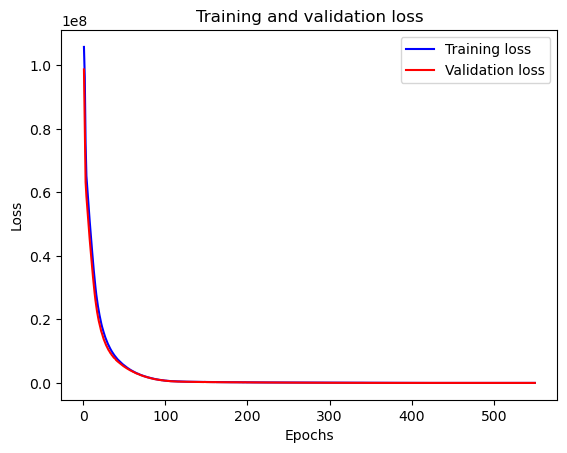

In [234]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'b', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

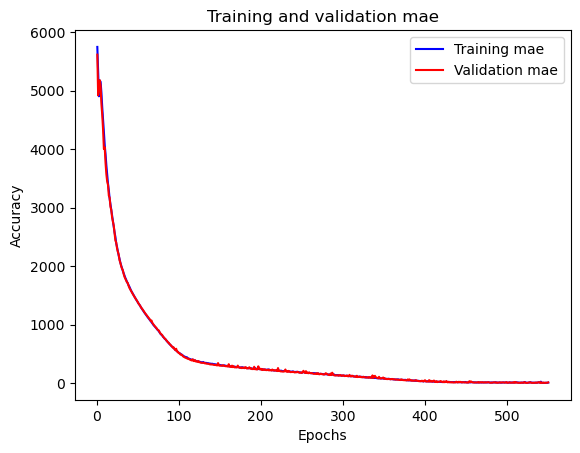

In [235]:
plt.clf()
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'b', label='Training mae')
plt.plot(epochs, val_acc_values, 'r', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [236]:
reg_model2.evaluate(X_test, y_test)

68/68 [==============================] - 0s 833us/step - loss: 366.2169 - mae: 10.3499


[366.2168884277344, 10.349868774414062]

In [312]:
y_test

8955      4607
10088      527
4729      2150
5731         0
3708       249
         ...  
9796         0
8969         0
638       1857
2628     17724
7329      3174
Name: TOTALBTUCOL, Length: 2157, dtype: int64

In [237]:
x_ex = X_test[1,:]
y_pred=reg_model2.predict(x_ex.reshape(1,-1))
print(y_pred[0])

1/1 [==============================] - 0s 43ms/step
[531.1112]


### MSE, MAE, R2 

In [263]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


y_pred = reg_model2.predict(X_test)  # X_test - тестовые данные
y_true = y_test  # y_test - фактические значения тестовых данных

# Вычисление MSE
mse2 = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error (MSE): {mse2}')

# Вычисление MAE
mae2 = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae2}')

# Вычисление R^2
r2_2 = r2_score(y_true, y_pred)
print(f'R-squared (R^2): {r2_2}')

68/68 [==============================] - 0s 701us/step
Mean Squared Error (MSE): 366.21805125025617
Mean Absolute Error (MAE): 10.349870887076793
R-squared (R^2): 0.9999948595965817


Model Evaluation Results:
  Metric      Model 1     Model 2
0    MSE  5792.209239  366.218051
1    MAE    46.152579   10.349871
2    R^2     0.999919    0.999995


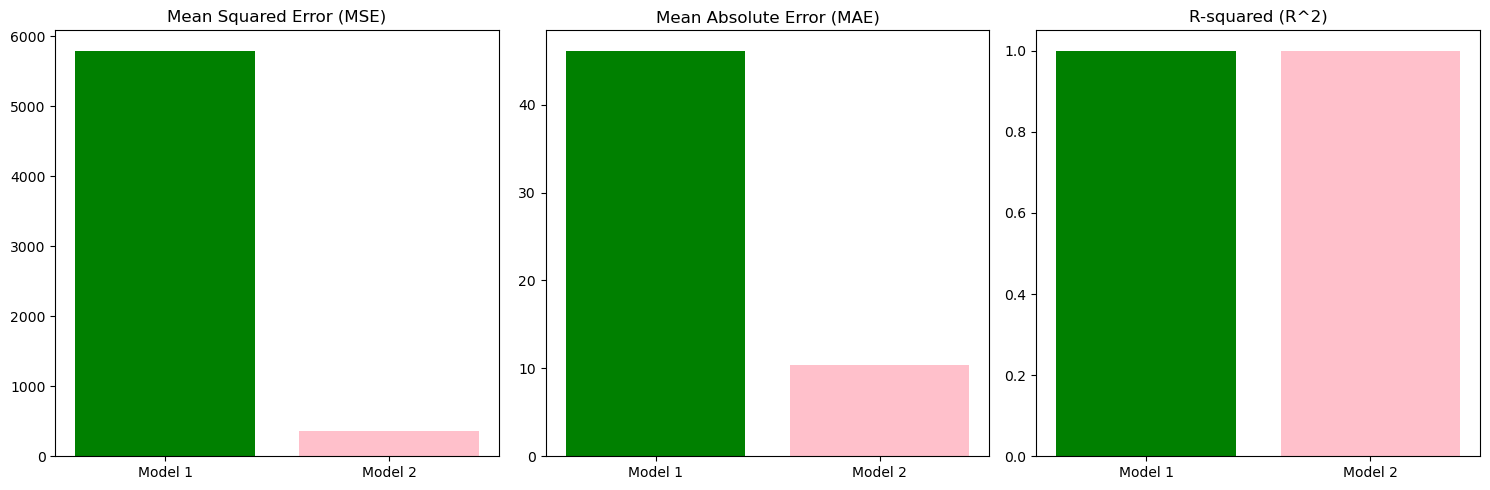

In [262]:
# Создание DataFrame для отображения результатов
results = pd.DataFrame({'Metric': ['MSE', 'MAE', 'R^2'],
                        'Model 1': [mse1, mae1, r2_1],
                        'Model 2': [mse2, mae2, r2_2]})

mse = [mse1, mse2]
mae = [mae1, mae2]
r2 = [r2_1, r2_2]

colors = ['green', 'pink']
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(['Model 1', 'Model 2'], mse, color=colors)
plt.title('Mean Squared Error (MSE)')

plt.subplot(132)
plt.bar(['Model 1', 'Model 2'], mae, color=colors)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(133)
plt.bar(['Model 1', 'Model 2'], r2, color=colors)
plt.title('R-squared (R^2)')

plt.tight_layout()

print("Model Evaluation Results:")
print(results)
plt.show()

Анализ результатов оценки моделей:

<b>MSE:</b>
Model 2 имеет гораздо более низкое значение MSE, это говорит о том, что Model 2 имеет лучшую точность прогнозирования, чем Model 1. Чем меньше значение MSE, тем ближе модель к идеальной.
    
<b>MAE:</b>
Model 2 лучше справляется с прогнозированием, так как MAE меньше.
    
<b>R^2:</b>
Обе модели имеют высокие значения R^2 (близкие к 1). Однако Model 2 имеет немного более высокое значение R^2, что указывает на более точное соответствие данным.
    
В общем, Model 2 превосходит Model 1 по всем метрикам оценки, следовательно, является более точной моделью для данной задачи прогнозирования.